In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import DataHelper as dh
import pandas_profiling as pd_prof

import statsmodels.stats.api as sm
from scipy import stats
import pylab 

In [2]:
data = pd.read_csv('./data/hmelq.csv')
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
dh.Information(data).printDescCol('job')

count      3409
unique        6
top       Other
freq       1431
Name: job, dtype: object


In [4]:
dataInfo = dh.Information(data)
dataInfo.printInfo()

The first 5 elements of the data
   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

Nb Columns:  13
Nb Records:  3576
Nb records null: 3164

Nb records null by columns:
bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64


### Data Desscription
We can see that the data contains many NaN values (null)

In [5]:
dataInfo.printDesc()

               bad          loan        mortdue          value          yoj  \
count  3576.000000   3576.000000    3262.000000    3512.000000  3264.000000   
mean      0.199385  18529.697987   74013.907992  101076.922759     8.832644   
std       0.399594  11262.834060   44016.833772   54865.275351     7.568046   
min       0.000000   1100.000000    2619.000000    8800.000000     0.000000   
25%       0.000000  11000.000000   46700.250000   65753.000000     3.000000   
50%       0.000000  16200.000000   65858.000000   89183.000000     7.000000   
75%       0.000000  23100.000000   91717.000000  118928.250000    13.000000   
max       1.000000  89900.000000  399550.000000  850000.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  3149.000000  3225.000000  3397.000000  3273.000000  3443.000000   
mean      0.261670     0.432558   179.832529     1.186373    21.507116   
std       0.865178     1.099230    87.066198     1.728723    10.16

In [8]:
dh.Information(dataNoNa).printDesc()

               bad          loan        mortdue          value          yoj  \
count  3576.000000   3576.000000    3576.000000    3576.000000  3576.000000   
mean      0.199385  18529.697987   72771.718644  101223.894989     8.757900   
std       0.399594  11262.834060   42688.150302   54872.251511     7.405768   
min       0.000000   1100.000000    2619.000000    8800.000000     0.000000   
25%       0.000000  11000.000000   46921.798077   65753.000000     3.000000   
50%       0.000000  16200.000000   64314.269231   89366.500000     7.000000   
75%       0.000000  23100.000000   89000.000000  119361.000000    13.000000   
max       1.000000  89900.000000  399550.000000  850000.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  3576.000000  3576.000000  3576.000000  3576.000000  3576.000000   
mean      0.288311     0.434843   179.137227     1.208613    21.258389   
std       0.869119     1.075543    85.573779     1.737632    10.20

### Filling NaN values
The numeric values are filled using Linear Interpolation by rows. And the Alphabetic values are changed later, by changing NaN to 'Not Specified' for job and reason (can not apply interpolation on non numeric values).

In [7]:
preData = dh.PreProcessing(data)
dataNoNa = preData.fillnaStrategyRow('linear')
dh.Information(dataNoNa).printInfo()

The first 5 elements of the data
   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

Nb Columns:  13
Nb Records:  3576
Nb records null: 314

Nb records null by columns:
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc      0
dtype: int64


In [9]:
dataNoNa['job'].fillna('No Specified', inplace=True)
dataNoNa['reason'].fillna('No Specified', inplace=True)

We can see here clearly that our data is clear now, it doesnt contain any NaN.

In [10]:
dh.Information(dataNoNa).printInfo()
dataNoNa.head()

The first 5 elements of the data
   bad   loan   mortdue     value   reason           job   yoj  derog  delinq  \
0    0  81200   18834.0  108355.0  HomeImp  No Specified  28.0    0.0     0.0   
1    0  12600  103960.0  127384.0  DebtCon  No Specified   2.0    0.0     0.0   
2    0  18000   46865.0   61266.0  DebtCon  No Specified   5.0    0.0     0.0   
3    0  10300   57676.0   71027.0  DebtCon  No Specified  19.0    0.0     0.0   
4    0   9400   56508.0   78358.0  DebtCon  No Specified  17.0    0.0     0.0   

    clage  ninq  clno  debtinc  
0  139.14   0.0  14.0   34.042  
1  129.02   0.0  25.0   34.479  
2  102.59   2.0   9.0   26.354  
3  157.52   1.0  11.0   33.992  
4  141.93   0.0  11.0   32.327  

Nb Columns:  13
Nb Records:  3576
Nb records null: 0

Nb records null by columns:
bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,No Specified,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,No Specified,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,No Specified,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,No Specified,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,No Specified,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [11]:
dh.Visulizer(dataNoNa, None).drawHist('job')

In [12]:
dh.Visulizer(dataNoNa, None).drawHist('reason')

The correlation table between all features. 

In [13]:
corr = dataNoNa.corr()
corr.style.background_gradient(cmap='coolwarm')

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.042055,-0.042739,-0.037519,0.247616,0.357611,-0.149183,0.166886,-0.008348,0.305268
loan,-0.071523,1.000000,0.207969,0.332059,0.103574,-0.009768,-0.022971,0.087527,0.040734,0.098973,0.045217
mortdue,-0.042055,0.207969,1.000000,0.809364,-0.080931,-0.053008,0.003114,0.116919,0.039626,0.335529,0.104376
value,-0.042739,0.332059,0.809364,1.000000,0.010226,-0.070299,-0.006990,0.173601,0.004973,0.286010,0.065658
yoj,-0.037519,0.103574,-0.080931,0.010226,1.000000,-0.069371,0.066950,0.169662,-0.072180,0.000348,-0.031517
derog,0.247616,-0.009768,-0.053008,-0.070299,-0.069371,1.000000,0.213784,-0.061941,0.119057,0.028411,0.067555
delinq,0.357611,-0.022971,0.003114,-0.006990,0.066950,0.213784,1.000000,0.043670,0.086319,0.152120,0.080983
clage,-0.149183,0.087527,0.116919,0.173601,0.169662,-0.061941,0.043670,1.000000,-0.102748,0.213445,-0.055547
ninq,0.166886,0.040734,0.039626,0.004973,-0.072180,0.119057,0.086319,-0.102748,1.000000,0.115494,0.120686
clno,-0.008348,0.098973,0.335529,0.286010,0.000348,0.028411,0.152120,0.213445,0.115494,1.000000,0.152802


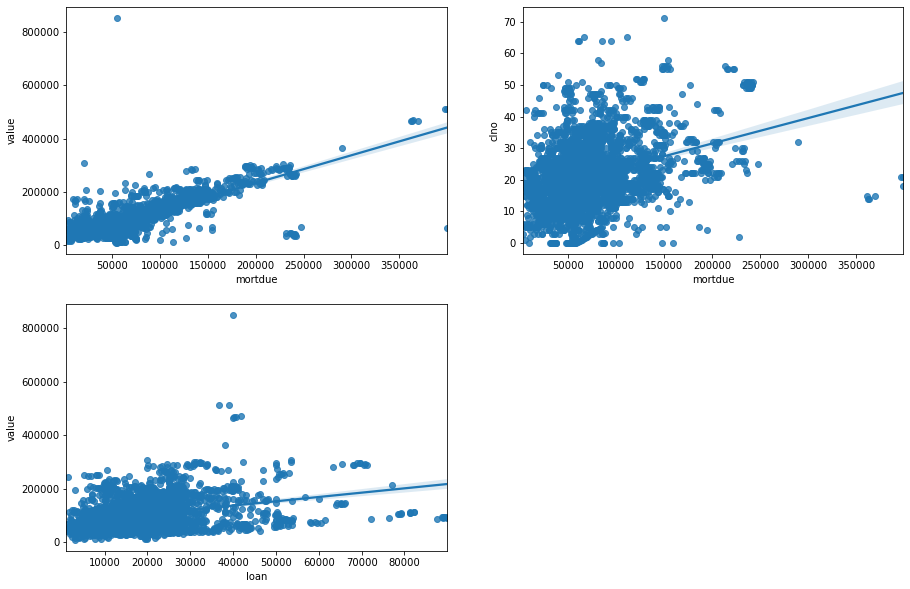

In [65]:
#sb.scatterplot(data = dataNoNa, x='clno', )
fig = plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
sb.regplot(data=dataNoNa, x='mortdue', y='value', fit_reg=True)


plt.subplot(2,2,2)
sb.regplot(data=dataNoNa, x='mortdue', y='clno', fit_reg=True)

plt.subplot(2,2,3)
sb.regplot(data=dataNoNa, x='loan', y='value', fit_reg=True)

In [49]:
#bins = bins = np.arange(0, pokemon['speed'].max()+5, 5)
print(dataNoNa['yoj'].max())
print(dataNoNa['yoj'].min())
print(dataNoNa['yoj'].mean())


41.0
0.0
8.757899888143177


In [55]:
pd.crosstab(index=data['bad'], columns=data['job'], normalize='columns')

job,Mgr,No Specified,Office,Other,ProfEx,Sales,Self
bad,,,,,,,
0,0.767896,0.916168,0.86819,0.767994,0.833116,0.651515,0.704348
1,0.232104,0.083832,0.13181,0.232006,0.166884,0.348485,0.295652


In [57]:
pd.crosstab(index=data['bad'], columns=data['reason'], normalize='columns')

reason,DebtCon,HomeImp,No Specified
bad,,,
0,0.814424,0.769376,0.802721
1,0.185576,0.230624,0.197279


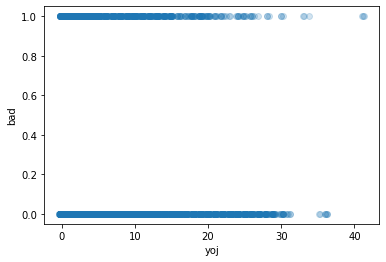

In [63]:
sb.regplot(dataNoNa['yoj'], dataNoNa['bad'], x_jitter=0.3, scatter_kws={'alpha': 0.2},fit_reg=False)

In [82]:
stats.ttest_ind(dataNoNa["clno"], dataNoNa["mortdue"], equal_var=True)

Ttest_indResult(statistic=-101.9124285487983, pvalue=0.0)

In [79]:
# Gaussian Distribution
stat, p = stats.shapiro(dataNoNa['loan'])
print("Stats = %0.2f, P= %0.2f"%(stat, p))
alpha = 0.05
if p > alpha:
    print('Is a Gaussian distribution (Fail to Reject H0)')
else:
    print('Not a Gaussian distribtion (reject H0)')

Stats = 0.85, P= 0.00
Not a Gaussian distribtion (reject H0)


In [ ]:
stat, p = stats.shapiro(dataNoNa['loan'])
print("Stats = %0.2f, P= %0.2f"%(stat, p))
alpha = 0.05
if p > alpha:
    print('Is a Gaussian distribution (Fail to Reject H0)')
else:
    print('Not a Gaussian distribtion (reject H0)')